# Heart Disease Prediction Project

## Objective:
Build a model to predict whether a person is at risk of heart disease based on their health data.

## Dataset:
Heart Disease UCI Dataset (available on Kaggle)

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             classification_report, roc_auc_score, roc_curve)
import joblib
import os

Load Data

In [2]:
# Load data
print("Loading data...")
try:
    df = pd.read_csv("data/heart.csv")
    print("✅ Data loaded successfully!")
    print(f"Shape: {df.shape}")
    display(df.head(3))
except Exception as e:
    print(f"❌ Error loading data: {e}")

Loading data...
✅ Data loaded successfully!
Shape: (297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0


Data Cleaning

In [3]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing values if any
# Example: Impute missing values with mean
# df.fillna(df.mean(), inplace=True)

# Ensure all features are numeric
print("\nData Types:")
print(df.dtypes)


Missing Values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Data Types:
age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


Exploratory Data Analysis (EDA)

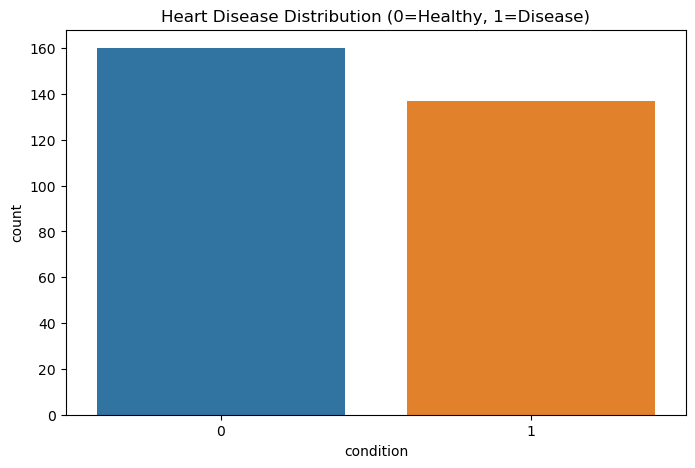

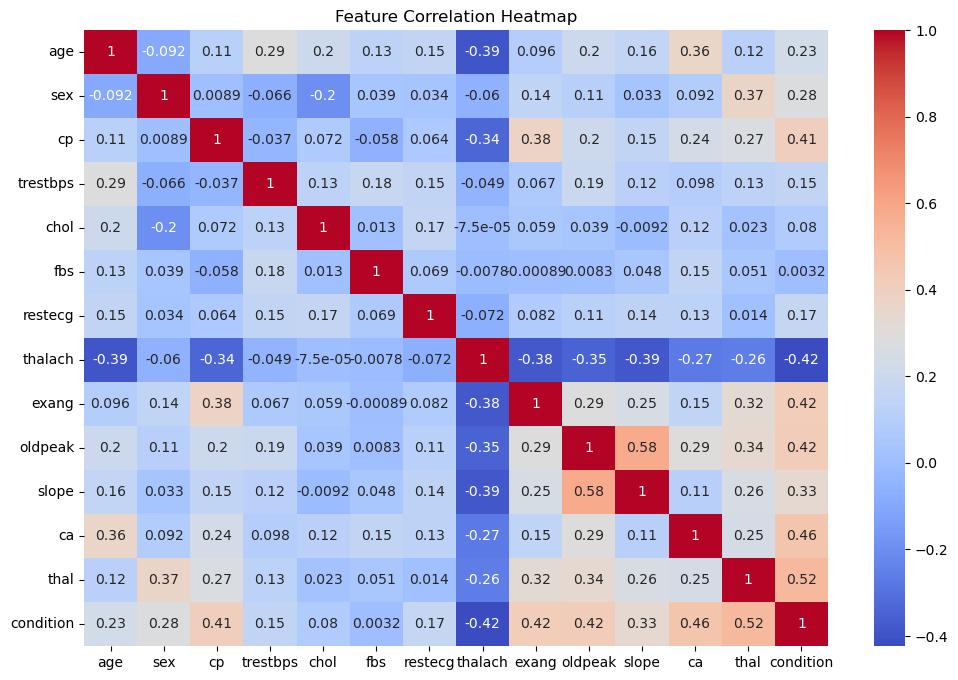

In [4]:
# Target distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='condition', data=df)
plt.title("Heart Disease Distribution (0=Healthy, 1=Disease)")
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Prepare Data for Modeling

In [5]:
# Separate features and target
X = df.drop('condition', axis=1)
y = df['condition']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✔️ Data prepared!")

✔️ Data prepared!


Train Model

In [7]:
# Train Logistic Regression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

print("✔️ Model trained!")

✔️ Model trained!


Evaluate Model

Accuracy: 0.92


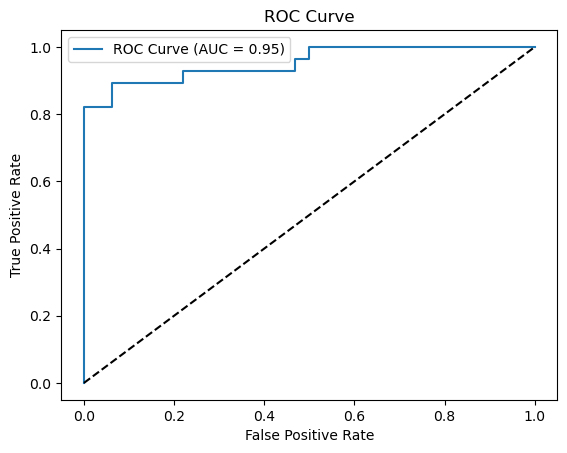

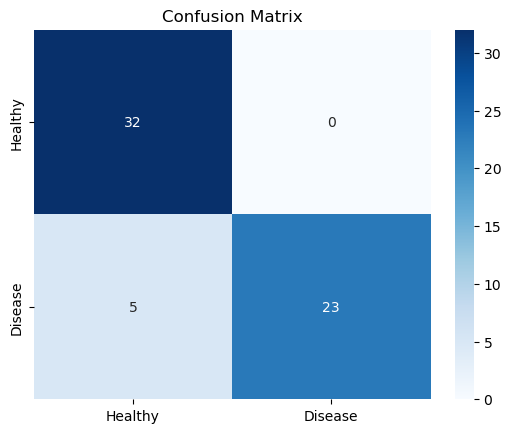

In [8]:
# Make predictions
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Healthy', 'Disease'],
            yticklabels=['Healthy', 'Disease'])
plt.title("Confusion Matrix")
plt.show()

Feature Importance

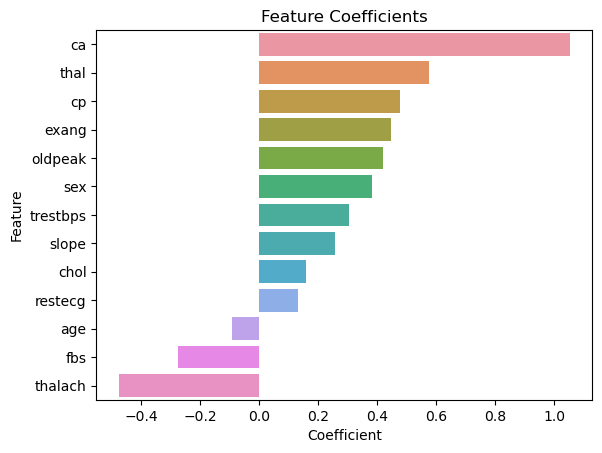

In [9]:
# For Logistic Regression
coefficients = model.coef_[0]
features = X.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Coefficients")
plt.show()

Save Model

In [10]:
# Save model and scaler
os.makedirs("models", exist_ok=True)
joblib.dump(model, "models/model1.pkl")
joblib.dump(scaler, "models/scaler1.pkl")

print("✔️ Model saved!")

✔️ Model saved!


Predict for diffrent patients to see how the model is working

In [11]:
# Input patient data
patient_data = {
    'age': 45,
    'sex': 1,
    'cp': 2,
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 170,
    'exang': 0,
    'oldpeak': 1.5,
    'slope': 1,
    'ca': 0,
    'thal': 2
}

# Convert to DataFrame
patient_df = pd.DataFrame([patient_data])

# Load model and scaler
model = joblib.load("models/model.pkl")
scaler = joblib.load("models/scaler.pkl")

# Scale the data
scaled_data = scaler.transform(patient_df)

# Make prediction
prediction = model.predict(scaled_data)
probability = model.predict_proba(scaled_data)[0][1]

# Output result
if prediction[0] == 1:
    print("Prediction: Heart Disease")
else:
    print("Prediction: Healthy")
print(f"Probability of Heart Disease: {probability * 100:.1f}%")

Prediction: Healthy
Probability of Heart Disease: 29.0%


In [13]:
# Import necessary libraries
import pandas as pd
import joblib

# Input patient data
patient_data = {
    'age': 30,
    'sex': 0,  # Female
    'cp': 0,   # No chest pain
    'trestbps': 120,  # Normal blood pressure
    'chol': 200,      # Normal cholesterol
    'fbs': 0,         # Fasting blood sugar < 120 mg/dl
    'restecg': 0,     # Normal resting ECG
    'thalach': 150,   # Normal heart rate
    'exang': 0,       # No exercise-induced angina
    'oldpeak': 0.5,   # Minimal ST depression
    'slope': 1,       # Upsloping peak exercise ST segment
    'ca': 0,          # No major vessels colored by fluoroscopy
    'thal': 1         # Normal thalassemia
}

# Print input data for confirmation
print("Patient Data:")
print(patient_data)

# Convert to DataFrame
patient_df = pd.DataFrame([patient_data])
print("\nPatient Data as DataFrame:")
print(patient_df)

# Load model and scaler
try:
    model = joblib.load("models/model.pkl")
    scaler = joblib.load("models/scaler.pkl")
    print("\n✅ Model and Scaler Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model or scaler: {e}")
    raise

# Scale the data
try:
    scaled_data = scaler.transform(patient_df)
    print("\nScaled Data:")
    print(scaled_data)  # Display scaled data for debugging
except Exception as e:
    print(f"❌ Error scaling data: {e}")
    raise

# Make prediction
try:
    prediction = model.predict(scaled_data)
    probability = model.predict_proba(scaled_data)[0][1]
    
    # Print prediction and probability
    print("\nPrediction Results:")
    if prediction[0] == 1:
        print("Prediction: Heart Disease")
    else:
        print("Prediction: Healthy")
    print(f"Probability of Heart Disease: {probability * 100:.1f}%")
except Exception as e:
    print(f"❌ Error making prediction: {e}")
    raise

Patient Data:
{'age': 30, 'sex': 0, 'cp': 0, 'trestbps': 120, 'chol': 200, 'fbs': 0, 'restecg': 0, 'thalach': 150, 'exang': 0, 'oldpeak': 0.5, 'slope': 1, 'ca': 0, 'thal': 1}

Patient Data as DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   30    0   0       120   200    0        0      150      0      0.5      1   

   ca  thal  
0   0     1  

✅ Model and Scaler Loaded Successfully!

Scaled Data:
[[-2.81344774 -1.49885801 -2.19767477 -0.6686904  -0.92750509 -0.40925259
  -0.98123015  0.02104949 -0.7004042  -0.47412028  0.62087132 -0.72444757
   0.15057815]]

Prediction Results:
Prediction: Healthy
Probability of Heart Disease: 12.0%


In [14]:
# Input patient data
patient_data = {
    'age': 65,
    'sex': 1,  # Male
    'cp': 3,   # Severe chest pain
    'trestbps': 140,  # Elevated blood pressure
    'chol': 280,      # High cholesterol
    'fbs': 1,         # Fasting blood sugar > 120 mg/dl
    'restecg': 2,     # Abnormal resting ECG
    'thalach': 120,   # Low heart rate
    'exang': 1,       # Exercise-induced angina
    'oldpeak': 2.5,   # Significant ST depression
    'slope': 2,       # Flat peak exercise ST segment
    'ca': 2,          # Two major vessels colored by fluoroscopy
    'thal': 3         # Reversible defect thalassemia
}

# Print input data for confirmation
print("Patient Data:")
print(patient_data)

# Convert to DataFrame
patient_df = pd.DataFrame([patient_data])
print("\nPatient Data as DataFrame:")
print(patient_df)

# Load model and scaler
try:
    model = joblib.load("models/model.pkl")
    scaler = joblib.load("models/scaler.pkl")
    print("\n✅ Model and Scaler Loaded Successfully!")
except Exception as e:
    print(f"❌ Error loading model or scaler: {e}")
    raise

# Scale the data
try:
    scaled_data = scaler.transform(patient_df)
    print("\nScaled Data:")
    print(scaled_data)  # Display scaled data for debugging
except Exception as e:
    print(f"❌ Error scaling data: {e}")
    raise

# Make prediction
try:
    prediction = model.predict(scaled_data)
    probability = model.predict_proba(scaled_data)[0][1]
    
    # Print prediction and probability
    print("\nPrediction Results:")
    if prediction[0] == 1:
        print("Prediction: Heart Disease")
    else:
        print("Prediction: Healthy")
    print(f"Probability of Heart Disease: {probability * 100:.1f}%")
except Exception as e:
    print(f"❌ Error making prediction: {e}")
    raise

Patient Data:
{'age': 65, 'sex': 1, 'cp': 3, 'trestbps': 140, 'chol': 280, 'fbs': 1, 'restecg': 2, 'thalach': 120, 'exang': 1, 'oldpeak': 2.5, 'slope': 2, 'ca': 2, 'thal': 3}

Patient Data as DataFrame:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   65    1   3       140   280    1        2      120      1      2.5      2   

   ca  thal  
0   2     3  

✅ Model and Scaler Loaded Successfully!

Scaled Data:
[[ 1.12604399  0.6671746   0.89036231  0.45767509  0.62570958  2.44347872
   1.03220314 -1.31521717  1.42774701  1.19427625  2.18625965  1.3195295
   2.24981475]]

Prediction Results:
Prediction: Heart Disease
Probability of Heart Disease: 99.0%
